# CNN - Convolutional Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255.0
flower = load_sample_image("flower.jpg") / 255.0

In [3]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels)

2 427 640 3


2022-07-01 12:38:58.461238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 12:38:58.485599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 12:38:58.485775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 12:38:58.486391: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

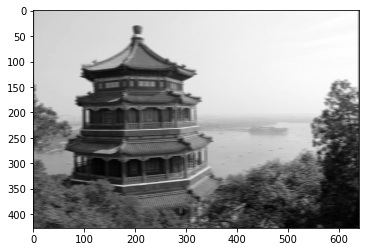

In [4]:
filters = np.zeros(shape=(7, 7,channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1 # horizental
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

In [5]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

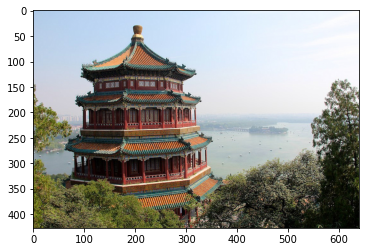

In [14]:
plt.imshow(images[0])
plt.show()

In [7]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

##### 깊이방향 풀링 층

```
# depthwise max_pool is only available in 'cpu' for now

output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),# kernel's size in channel is 3
                        strides=(1, 1, 1, 3),
                        padding="VALID") # input channel has to be dividable by 3!
                        
# to use it as keras model's layer
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")
```

In [8]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
#outputs one value for a feature map -> a really distructive layers!

# is the same as
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2])) # one value for each batch, feature

## train on fashion mnist

In [9]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.reshape(-1,28,28,1) / 255.0
X_test= X_test.reshape(-1,28,28,1) / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = "relu", padding="same", input_shape=[28,28,1]), #output = N * 28 * 28 * 64
    keras.layers.MaxPool2D(2), # output = N * 14 * 14 * 64
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"), # output = N * 14 * 14 * 128
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"), # output = N * 14 * 14 * 128
    keras.layers.MaxPool2D(2), # output = N * 7 * 7 * 128
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"), # output = N * 7 * 7 * 256
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"), # output = N * 7 * 7 * 256
    keras.layers.MaxPool2D(2), # output = N * 3 * 3 * 256
    keras.layers.Flatten(), # output = N * (3*3*256)
    keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal", kernel_constraint=keras.constraints.MaxNorm(5)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal", kernel_constraint=keras.constraints.MaxNorm(5)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal", kernel_constraint=keras.constraints.MaxNorm(5)),
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.8195 - accuracy: 0.6997 - val_loss: 0.4155 - val_accuracy: 0.8483
Epoch 2/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4596 - accuracy: 0.8407 - val_loss: 0.3459 - val_accuracy: 0.8759
Epoch 3/10
1407/1407 [==============================] - 16s 12ms/step - loss: 0.3929 - accuracy: 0.8651 - val_loss: 0.3243 - val_accuracy: 0.8841
Epoch 4/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3462 - accuracy: 0.8806 - val_loss: 0.3068 - val_accuracy: 0.8920
Epoch 5/10
1407/1407 [==============================] - 13s 10ms/step - loss: 0.3161 - accuracy: 0.8924 - val_loss: 0.3022 - val_accuracy: 0.8943
Epoch 6/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.2938 - accuracy: 0.8992 - val_loss: 0.2981 - val_accuracy: 0.8985
Epoch 7/10
1407/1407 [==============================] - 16s 11ms/step - loss: 0.2746 - accuracy: 0.9069 - val_loss: 0.2731 -

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3080 - accuracy: 0.9049


[0.3080170154571533, 0.9049000144004822]

## ResNet-34 CNN

In [22]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation) # get activations like this!
        
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers=[]
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                keras.layers.BatchNormalization()]
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [43]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3], padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters=64 # number is 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters==prev_filters else 2 # if diff -> strides is not 1!
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())# use this layer to get global avg pool!
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation="softmax"))

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ResNet-34.png')

In [45]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

In [138]:
train_set_raw,valid_set_raw,test_set_raw = tfds.load("tf_flowers", split=('train[:75%]', 'train[75%:90%]', 'train[90%:]'), as_supervised=True)

In [139]:
from functools import partial
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat() # an infinite dataset!
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1) # use partial to put in values for a function!
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [49]:
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [51]:
history = model.fit(train_set, epochs=100, validation_data=valid_set)

Epoch 1/100
86/86 [==============================] - 14s 164ms/step - loss: 0.9509 - accuracy: 0.6417 - val_loss: 1.0027 - val_accuracy: 0.6171
Epoch 2/100
86/86 [==============================] - 14s 164ms/step - loss: 0.9340 - accuracy: 0.6479 - val_loss: 0.9976 - val_accuracy: 0.6570
Epoch 3/100
86/86 [==============================] - 14s 164ms/step - loss: 0.9385 - accuracy: 0.6577 - val_loss: 1.0379 - val_accuracy: 0.6570
Epoch 4/100
86/86 [==============================] - 14s 164ms/step - loss: 0.8629 - accuracy: 0.6693 - val_loss: 1.5109 - val_accuracy: 0.5662
Epoch 5/100
86/86 [==============================] - 14s 164ms/step - loss: 0.8439 - accuracy: 0.6879 - val_loss: 1.0076 - val_accuracy: 0.6443
Epoch 6/100
86/86 [==============================] - 14s 164ms/step - loss: 0.8096 - accuracy: 0.7024 - val_loss: 1.2469 - val_accuracy: 0.5844
Epoch 7/100
86/86 [==============================] - 14s 164ms/step - loss: 0.7598 - accuracy: 0.7166 - val_loss: 0.9792 - val_accuracy:

86/86 [==============================] - 14s 165ms/step - loss: 0.0570 - accuracy: 0.9793 - val_loss: 2.2762 - val_accuracy: 0.6806
Epoch 58/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0680 - accuracy: 0.9764 - val_loss: 1.9440 - val_accuracy: 0.6788
Epoch 59/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 1.6817 - val_accuracy: 0.6951
Epoch 60/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 1.7142 - val_accuracy: 0.6788
Epoch 61/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 1.5047 - val_accuracy: 0.7187
Epoch 62/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0593 - accuracy: 0.9804 - val_loss: 2.5009 - val_accuracy: 0.6897
Epoch 63/100
86/86 [==============================] - 14s 165ms/step - loss: 0.0405 - accuracy: 0.9855 - val_loss: 1.6616 - val_accuracy: 0.669

## 케라스에서 제공하는 사전훈련된 모델 사용하기
* using pretrained model

In [57]:
model = keras.applications.ResNet50(weights="imagenet") # using pretrained model!

In [53]:
images_resized = tf.image.resize(images, [224, 224]) #calling this resizes the image

In [54]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 50)

In [58]:
Y_proba = model.predict(inputs)
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)
for image_index in range(len(images)):
    print("image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("   {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

image #0
   n04346328 - stupa        88.27%
   n02825657 - bell_cote    3.38%
   n03854065 - organ        2.07%
   n03781244 - monastery    1.04%
   n02980441 - castle       0.94%
image #1
   n11939491 - daisy        11.96%
   n04522168 - vase         9.60%
   n03637318 - lampshade    7.70%
   n03445777 - golf_ball    7.14%
   n02948072 - candle       6.48%


## 사전훈련된 모델을 사용한 전이 학습

In [59]:
# for less data -> to prevent overfitting, we use pretrained models
print(dataset_size)
print(class_names)
print(n_classes)

3670
['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
5


sunflowers


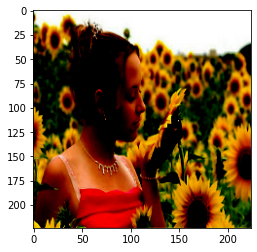

dandelion


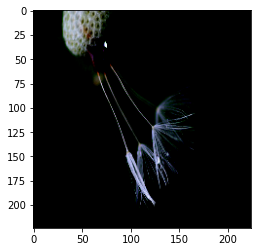

tulips


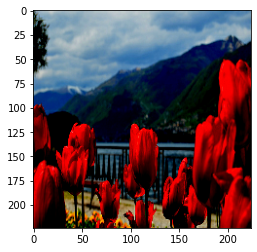

In [76]:
for item, label in train_set.take(3):
    plt.imshow(item[0])
    print(class_names[label[0]])
    plt.show()

In [131]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)

83697664/83683744 [==============================] - 5s 0us/step


In [132]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output) # use model's output to connect to another layer! -> which was already another model
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [144]:
# at first, freeze weights!
for layer in base_model.layers:
    layer.trainable = False

In [146]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01) # use decay for momemtum -> how much the optimizer forgets
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(train_set, epochs=10,
          steps_per_epoch=int(0.75 * dataset_size / batch_size),
          validation_data=valid_set,
          validation_steps=int(0.15 * dataset_size / batch_size)) # cause we are providing an infinite dataset -> need to provide the steps for one epoch

Epoch 1/10
86/86 [==============================] - 15s 160ms/step - loss: 0.3581 - accuracy: 0.9102 - val_loss: 0.4684 - val_accuracy: 0.8989
Epoch 2/10
86/86 [==============================] - 13s 154ms/step - loss: 0.2425 - accuracy: 0.9382 - val_loss: 0.5941 - val_accuracy: 0.8824
Epoch 3/10
86/86 [==============================] - 13s 155ms/step - loss: 0.1871 - accuracy: 0.9404 - val_loss: 0.4305 - val_accuracy: 0.8952
Epoch 4/10
86/86 [==============================] - 13s 155ms/step - loss: 0.1296 - accuracy: 0.9582 - val_loss: 0.3814 - val_accuracy: 0.9044
Epoch 5/10
86/86 [==============================] - 13s 155ms/step - loss: 0.0905 - accuracy: 0.9702 - val_loss: 0.3655 - val_accuracy: 0.9026
Epoch 6/10
86/86 [==============================] - 13s 155ms/step - loss: 0.1136 - accuracy: 0.9626 - val_loss: 0.3761 - val_accuracy: 0.9062
Epoch 7/10
86/86 [==============================] - 13s 155ms/step - loss: 0.0788 - accuracy: 0.9709 - val_loss: 0.3875 - val_accuracy: 0.9007

In [149]:
# 동결 해제하고 세부적 튜닝! -> 동결하거나 해재할 때 다시 컴파일 필요!! ##
for layer in base_model.layers:
    layer.trainable = True ##
# 세밀한 튜닝을 위해 작은 lr!
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("Xception-flower.h5", save_best_only=True)
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01) # use decay for momemtum -> how much the optimizer forgets
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(train_set, epochs=100,
          steps_per_epoch=int(0.75 * dataset_size / batch_size),
          validation_data=valid_set,
          validation_steps=int(0.15 * dataset_size / batch_size),
          callbacks=[earlystopping_cb, checkpoint_cb]) # cause we are providing an infinite dataset -> need to provide the steps for one epoch


Epoch 1/100
86/86 [==============================] - 52s 579ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.2790 - val_accuracy: 0.9393
Epoch 2/100
86/86 [==============================] - 50s 579ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.2004 - val_accuracy: 0.9412
Epoch 3/100
86/86 [==============================] - 49s 573ms/step - loss: 0.0207 - accuracy: 0.9924 - val_loss: 0.2085 - val_accuracy: 0.9504
Epoch 4/100
86/86 [==============================] - 49s 569ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.2196 - val_accuracy: 0.9449
Epoch 5/100
86/86 [==============================] - 49s 573ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.2289 - val_accuracy: 0.9430
Epoch 6/100
86/86 [==============================] - 49s 572ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.2410 - val_accuracy: 0.9412
Epoch 7/100
86/86 [==============================] - 49s 576ms/step - loss: 0.0107 - accuracy: 0.9953 - val_loss: 0.2309 - val_accuracy:

In [150]:
model.evaluate(test_set)

12/12 [==============================] - 2s 127ms/step - loss: 0.2238 - accuracy: 0.9346


[0.2238229662179947, 0.9346048831939697]